# **Data Analysis on CSV Files**

## **Analyze sales data using pandas and matplotlib**

In [1]:
# 1. Install and Import Libraries
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
# 2. Upload CSV File in Colab
from google.colab import files
uploaded = files.upload()


Saving sample_sales.csv to sample_sales.csv


In [4]:
# 3. Read CSV file
# Change 'your_file.csv' to the actual file name you uploaded
df = pd.read_csv("sample_sales.csv")

In [6]:
# 4. Preview Data
print("First 5 rows of dataset:")
display(df.head())

print("\nBasic Info:")
df.info()

print("\nSummary Statistics:")
display(df.describe())

First 5 rows of dataset:


,Date,Category,Sales
0,2025-01-05,Electronics,1200
1,2025-01-07,Clothing,450
2,2025-01-10,Electronics,800
3,2025-02-03,Clothing,700
4,2025-02-12,Furniture,1500



Basic Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      9 non-null      object
 1   Category  9 non-null      object
 2   Sales     9 non-null      int64 
dtypes: int64(1), object(2)
memory usage: 348.0+ bytes

Summary Statistics:


,Sales
count,9.000000
mean,955.555556
std,342.275880
min,450.000000
25%,700.000000
50%,900.000000
75%,1200.000000
max,1500.000000


In [7]:
grouped_data = df.groupby("Category")["Sales"].sum().reset_index()

print("\nSales by Category:")
display(grouped_data)


Sales by Category:


,Category,Sales
0,Clothing,1800
1,Electronics,2900
2,Furniture,3900


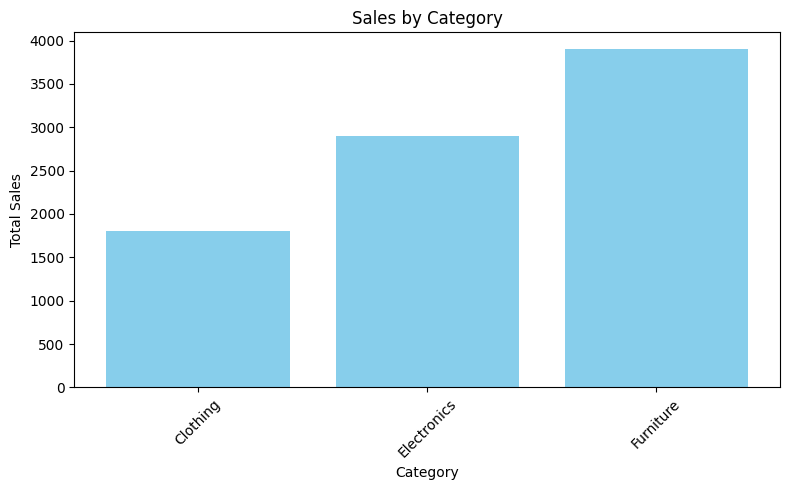

In [8]:
# 5. Plot the grouped data
plt.figure(figsize=(8,5))
plt.bar(grouped_data["Category"], grouped_data["Sales"], color="skyblue")
plt.xlabel("Category")
plt.ylabel("Total Sales")
plt.title("Sales by Category")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

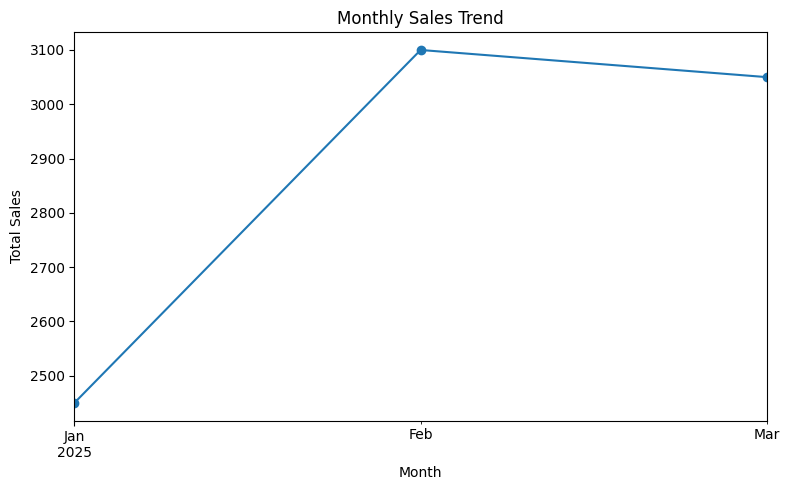

In [9]:
# 6. Time-based analysis
if "Date" in df.columns:
    df["Date"] = pd.to_datetime(df["Date"])
    sales_by_month = df.groupby(df["Date"].dt.to_period("M"))["Sales"].sum()

    plt.figure(figsize=(8,5))
    sales_by_month.plot(kind="line", marker="o")
    plt.xlabel("Month")
    plt.ylabel("Total Sales")
    plt.title("Monthly Sales Trend")
    plt.tight_layout()
    plt.show()